In [98]:
import pandas as pd
import datetime as dt
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
conn = sqlite3.connect('work_mode.db')
query = '''
SELECT client_id, time, latitude, longitude, altitude, speed, course, sat, name
FROM work_mode;
'''
df = pd.read_sql_query(query,conn)

In [101]:
df

,client_id,time,latitude,longitude,altitude,speed,course,sat,name
0,40,09.09.2020 15:34,55.84783937,37.57457114,183.9,39.0,349.3,10,
1,40,09.09.2020 15:34,55.84793231,37.57455089,183.9,38.0,353.0,10,
2,40,09.09.2020 15:34,55.84802312,37.57451826,183.7,36.0,348.6,10,
3,40,09.09.2020 15:34,55.8481043,37.57448046,183.4,34.0,345.4,10,
4,40,09.09.2020 15:34,55.84818198,37.57444928,182.8,32.0,347.3,10,
...,...,...,...,...,...,...,...,...,...
148436,40,09.09.2020 16:56,56.33969393,37.51583132,164.4,3.0,8.5,11,
148437,40,09.09.2020 16:56,56.33969972,37.51583259,163.5,3.0,6.9,13,
148438,40,09.09.2020 16:56,56.33970765,37.51583565,163.4,4.0,12.1,13,
148439,40,09.09.2020 16:56,56.33971711,37.51584155,162.6,5.0,19.1,12,


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148441 entries, 0 to 148440
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   client_id  148441 non-null  object
 1   time       148441 non-null  object
 2   latitude   148441 non-null  object
 3   longitude  148441 non-null  object
 4   altitude   148441 non-null  object
 5   speed      148441 non-null  object
 6   course     148441 non-null  object
 7   sat        148441 non-null  object
 8   name       148441 non-null  object
dtypes: object(9)
memory usage: 10.2+ MB


In [104]:
df.duplicated().sum()

87951

In [105]:
df = df.drop_duplicates().reset_index(drop = True)
df.duplicated().sum()

0

In [106]:
ax = sns.boxplot(x="client_id", y="speed",
                 data=df, palette="Set3")

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [90]:
df['speed'] = df['speed'].astype('float')

df = df.query('speed <= 80') #speed limit

In [107]:
df['client_id'] = df['client_id'].astype('int')
df['time'] = df['time'].apply(pd.to_datetime)
df['altitude'] = df['altitude'].astype('float') 
df['course'] = df['course'].astype('float')
df['sat'] = df['sat'].astype('int')

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60490 entries, 0 to 60489
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   client_id  60490 non-null  int64         
 1   time       60490 non-null  datetime64[ns]
 2   latitude   60490 non-null  object        
 3   longitude  60490 non-null  object        
 4   altitude   60490 non-null  float64       
 5   speed      60490 non-null  object        
 6   course     60490 non-null  float64       
 7   sat        60490 non-null  int64         
 8   name       60490 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 4.2+ MB


In [110]:
df.isnull().count()

client_id    60490
time         60490
latitude     60490
longitude    60490
altitude     60490
speed        60490
course       60490
sat          60490
name         60490
dtype: int64

In [113]:
df

,client_id,time,latitude,longitude,altitude,speed,course,sat,name
0,40,2020-09-09 15:34:00,55.84783937,37.57457114,183.9,39.0,349.3,10,
1,40,2020-09-09 15:34:00,55.84793231,37.57455089,183.9,38.0,353.0,10,
2,40,2020-09-09 15:34:00,55.84802312,37.57451826,183.7,36.0,348.6,10,
3,40,2020-09-09 15:34:00,55.8481043,37.57448046,183.4,34.0,345.4,10,
4,40,2020-09-09 15:34:00,55.84818198,37.57444928,182.8,32.0,347.3,10,
...,...,...,...,...,...,...,...,...,...
60485,40,2020-09-09 15:34:00,55.8473442,37.57471471,182.7,44.0,352.1,11,
60486,40,2020-09-09 15:34:00,55.84744661,37.57469669,183.0,42.0,354.4,11,
60487,40,2020-09-09 15:34:00,55.84755019,37.57466576,183.3,42.0,350.5,11,
60488,40,2020-09-09 15:34:00,55.84765063,37.57464118,184.0,40.0,352.2,11,


In [114]:
df

,client_id,time,latitude,longitude,altitude,speed,course,sat,name
0,40,2020-09-09 15:34:00,55.84783937,37.57457114,183.9,39.0,349.3,10,
1,40,2020-09-09 15:34:00,55.84793231,37.57455089,183.9,38.0,353.0,10,
2,40,2020-09-09 15:34:00,55.84802312,37.57451826,183.7,36.0,348.6,10,
3,40,2020-09-09 15:34:00,55.8481043,37.57448046,183.4,34.0,345.4,10,
4,40,2020-09-09 15:34:00,55.84818198,37.57444928,182.8,32.0,347.3,10,
...,...,...,...,...,...,...,...,...,...
60485,40,2020-09-09 15:34:00,55.8473442,37.57471471,182.7,44.0,352.1,11,
60486,40,2020-09-09 15:34:00,55.84744661,37.57469669,183.0,42.0,354.4,11,
60487,40,2020-09-09 15:34:00,55.84755019,37.57466576,183.3,42.0,350.5,11,
60488,40,2020-09-09 15:34:00,55.84765063,37.57464118,184.0,40.0,352.2,11,


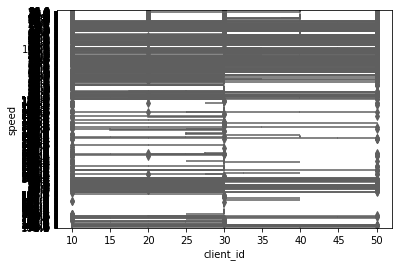

In [117]:
ax = sns.boxplot(x="client_id", y="speed",
                 data=df, palette="Set3")

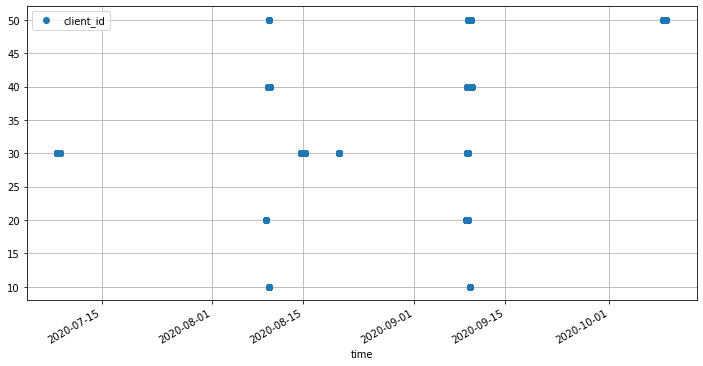

In [118]:
df.plot(x='time', y='client_id', style='o', grid=True, figsize=(12, 6))